In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_params(fname):
    params = {}
    with open(fname) as f:
        for line in f:
            (key, val) = line.split()
            try:
                params[key] = float(val)
            except:
                params[key] = val
    return params

In [3]:
def read_stars(fname):
    with open(fname) as f:
        nstars = np.fromfile(f, dtype=np.int32, count=1)[0]
        rectangular = np.fromfile(f, dtype=np.int32, count=1)[0]
        corner = np.fromfile(f, dtype=np.float32, count=2)
        theta_e = np.fromfile(f, dtype=np.float32, count=1)[0]
        stars = np.fromfile(f, dtype=np.float32)
        stars = stars.reshape(nstars, 3)
    return stars

In [4]:
def read_map(fname, is_ipm = True):
    with open(fname) as f:
        nrows, ncols = np.fromfile(f, dtype=np.int32, count=2)
        if is_ipm:
            dat = np.fromfile(f, dtype=np.float32)
        else:
            dat = np.fromfile(f, dtype=np.int32)
        dat = dat.reshape(nrows,ncols)
    return dat

In [5]:
def read_hist(fname):
    return np.loadtxt(fname, dtype=np.int32)

In [19]:
is_ipm = True
if is_ipm:
    prefix = 'ipm_'
else:
    prefix = 'irs_'

In [61]:
params = read_params(f'{prefix}parameter_info.txt')
params

{'kappa_tot': 0.400000006,
 'shear': 0.400000006,
 'mu_ave': 5.0,
 'smooth_fraction': 0.0,
 'kappa_star': 0.400000006,
 'kappa_star_actual': 0.400000036,
 'theta_e': 1.0,
 'random_seed': -1692514417.0,
 'mass_function': 'equal',
 'm_lower': 1.0,
 'm_upper': 1.0,
 'mean_mass': 1.0,
 'mean_mass2': 1.0,
 'm_lower_actual': 1.0,
 'm_upper_actual': 1.0,
 'mean_mass_actual': 1.0,
 'mean_mass2_actual': 1.0,
 'light_loss': 0.00999999978,
 'num_stars': 61926.0,
 'rad': 393.465363,
 'safety_scale': 1.37,
 'center_y1': 0.0,
 'center_y2': 0.0,
 'half_length_source': 50.0,
 'num_pixels': 5000.0,
 'mean_rays_per_pixel': 1.0,
 'half_length_image_x1': 57.5999985,
 'half_length_image_x2': 282.880005,
 'ray_sep': 0.0199999996,
 't_ray_shoot': 9.898}

In [62]:
stars = read_stars(f'{prefix}stars.bin')

(61926, 3)


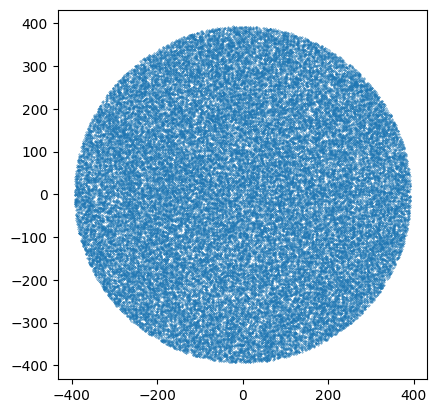

In [63]:
print(stars.shape)
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=0.1)
ax.set_aspect(1)
plt.show()

In [64]:
dat = read_map(f'{prefix}magnifications.bin', is_ipm)
# magnification
if is_ipm:
    mu = dat
else:
    mu = dat / params['mean_rays_per_pixel']
print(np.min(mu))
print(np.max(mu))
print(np.mean(mu))
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))
print(np.max(mags))
print(np.min(mags))

1.1008788
95.48816
4.865003
1.6430762
-3.2024488


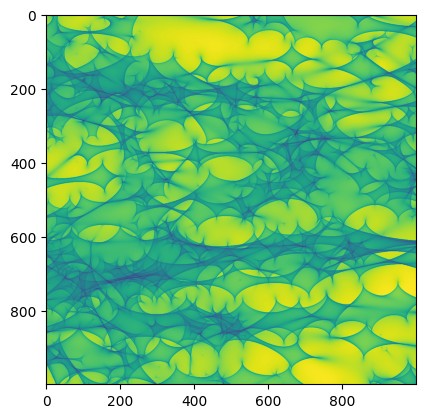

In [65]:
fix, ax = plt.subplots()
ax.imshow(mags[:1000,:1000])
ax.set_aspect(1)
plt.show()

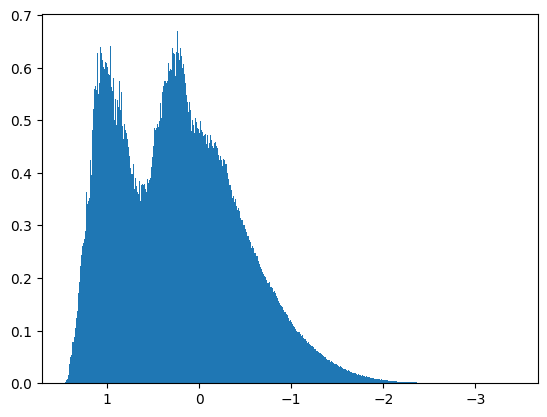

In [67]:
# dat, num pixels
dat, num_pixels = read_hist(f'irs_numrays_numpixels.txt').T
# magnification
if is_ipm:
    mu = dat / 1000.
else:
    mu = dat / params['mean_rays_per_pixel']
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))

fig, ax = plt.subplots()
ax.hist(mags, weights=num_pixels, density=True, bins = 1000)
ax.invert_xaxis()
plt.show()